In [207]:
from scipy.optimize import curve_fit
from scipy import stats
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Image, IFrame, HTML
import scipy.constants as const
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

In [208]:
EPS_pravokotni = pd.read_excel('./DielTK_podatki/DielTK_meritve.xlsx', engine='openpyxl',skiprows=1,nrows=34,usecols='A:B',names=['T','C'])

EPS_vzporedni = pd.read_excel('./DielTK_podatki/DielTK_meritve.xlsx', engine='openpyxl',skiprows=1,nrows=45,usecols='D:E',names=['T','C'])

In [209]:
C_p0 = 0.06 # nF
C_v0 = 0.05 # nF

In [210]:
EPS_pravokotni['epsilon'] = EPS_pravokotni['C'] * 1e-3 / C_p0
EPS_vzporedni['epsilon'] = EPS_vzporedni['C'] * 1e-3 / C_v0

EPS_perp_fit_10 = np.poly1d(np.polyfit(EPS_pravokotni['T'], EPS_pravokotni['epsilon'], 10))
EPS_perp_fit = np.poly1d(np.polyfit(EPS_pravokotni['T'], EPS_pravokotni['epsilon'], 5))
EPS_para_fit = np.poly1d(np.polyfit(EPS_vzporedni['T'], EPS_vzporedni['epsilon'], 5))

In [211]:
x_theoretical = np.linspace(min(EPS_pravokotni['T']),max(EPS_pravokotni['T']))

epsilon_povp = 1/3*(2*EPS_perp_fit(x_theoretical) + EPS_para_fit(x_theoretical))
epsilon_delta = EPS_perp_fit(x_theoretical) - EPS_para_fit(x_theoretical)

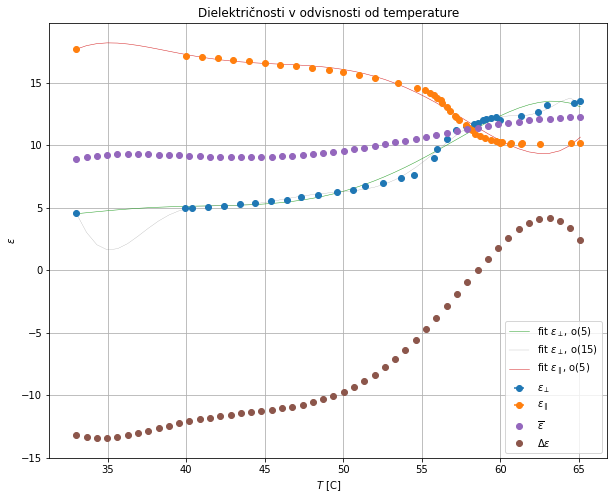

In [212]:
plt.errorbar(EPS_pravokotni['T'],EPS_pravokotni['epsilon'],xerr=0.1,fmt='o',label='$\epsilon_{\perp}$')
plt.errorbar(EPS_vzporedni['T'],EPS_vzporedni['epsilon'],xerr=0.1,fmt='o',label='$\epsilon_{\parallel}$')

plt.plot(x_theoretical,EPS_perp_fit(x_theoretical),label='fit $\epsilon_{\perp}$, o(5)',linewidth=0.5)
plt.plot(x_theoretical,EPS_perp_fit_10(x_theoretical),label='fit $\epsilon_{\perp}$, o(15)',color='gray',linewidth=0.2)
plt.plot(x_theoretical,EPS_para_fit(x_theoretical),label='fit $\epsilon_{\parallel}$, o(5)',linewidth=0.5)

plt.errorbar(x_theoretical,epsilon_povp,fmt='o',label='$\overline{\epsilon}$')
plt.errorbar(x_theoretical,epsilon_delta,fmt='o',label='$\Delta \epsilon$')

plt.title('Dielektričnosti v odvisnosti od temperature')

plt.legend()
plt.grid()

plt.xlabel("$T$ [C]")
plt.ylabel("$\epsilon$")

plt.savefig('dielektricnosti.png',dpi=200,bbox_inches='tight')

plt.show()

## Frederiksov prehod

In [213]:
frederik = pd.read_excel('./DielTK_podatki/DielTK_meritve.xlsx', engine='openpyxl',skiprows=0,nrows=33,usecols='G:H',names=['ch2','ch1'])

In [214]:
frederik['U_RMS'] = frederik['ch1']/np.sqrt(2)
frederik['C'] = (frederik['ch1']/frederik['ch2'])/(1e5*2*np.pi)

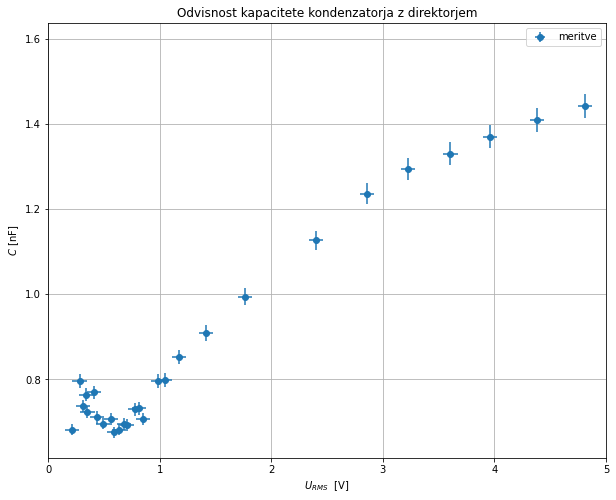

In [215]:
plt.errorbar(frederik['U_RMS'],frederik['C']*1e6,fmt='o',xerr=0.09/np.sqrt(2),yerr=frederik['C']*1e6*0.02,label='meritve')

plt.xlim(0,5)

plt.title('Odvisnost kapacitete kondenzatorja z direktorjem')

plt.legend()
plt.grid()

plt.xlabel("$U_{RMS}$  [V]")
plt.ylabel("$C$ [nF]")

plt.savefig('kapaciteta.png',dpi=200,bbox_inches='tight')

plt.show()

In [225]:
Uc = 0.8
delta_eps = -EPS_perp_fit(33) + EPS_para_fit(33) 
print(delta_eps)

K = (Uc/np.pi)**2 * (delta_eps * const.epsilon_0)
K

13.15666430705852


7.553961242980757e-12